In [2]:
import time
start_time = time.time()
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
# Standard imports
import numpy as np
import pandas as pd
import time
import warnings

# Qiskit 
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, ADAM, SLSQP, AQGD
from qiskit_algorithms.utils import algorithm_globals

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit.visualization import plot_histogram
from IPython.display import clear_output

# Machine learning and preprocessing
from sklearn.datasets import load_iris, load_digits,load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [3]:
datasets = [load_iris, load_digits, load_wine, load_breast_cancer]  

def data_preprocess(dataset):
    data = dataset()
    dataset_features = data.data
    dataset_labels = data.target
    dataset_features = MinMaxScaler().fit_transform(dataset_features)
    algorithm_globals.random_seed = 4701
    data_set_num_features = dataset_features.shape[1]
    dataset_train_features, dataset_test_features, dataset_train_labels, dataset_test_labels = train_test_split(
        dataset_features, dataset_labels, train_size=0.8, random_state=algorithm_globals.random_seed)
    
    print(f'{dataset.__name__} preprocessed')
    return dataset_train_features, dataset_test_features, dataset_train_labels, dataset_test_labels, data_set_num_features

In [4]:
for dataset in datasets:
    print(f'{dataset.__name__}')
    train_features, test_features, train_labels, test_labels, num_features = data_preprocess(dataset)
    
    svc = SVC()
    svc.fit(train_features, train_labels)
    
    predictions = svc.predict(test_features)
    accuracy = svc.score(test_features, test_labels)
    
    print(f'{dataset.__name__} SVC Score: {accuracy:.4f}')


load_iris
load_iris preprocessed
load_iris SVC Score: 0.9000
load_digits
load_digits preprocessed
load_digits SVC Score: 0.9917
load_wine
load_wine preprocessed
load_wine SVC Score: 1.0000
load_breast_cancer
load_breast_cancer preprocessed
load_breast_cancer SVC Score: 0.9825


Iris Data Quantum

In [6]:
train_features, test_features, train_labels, test_labels, num_features = data_preprocess(load_iris)
feature_map = ZZFeatureMap(feature_dimension=num_features, reps = 1)
ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

load_iris preprocessed


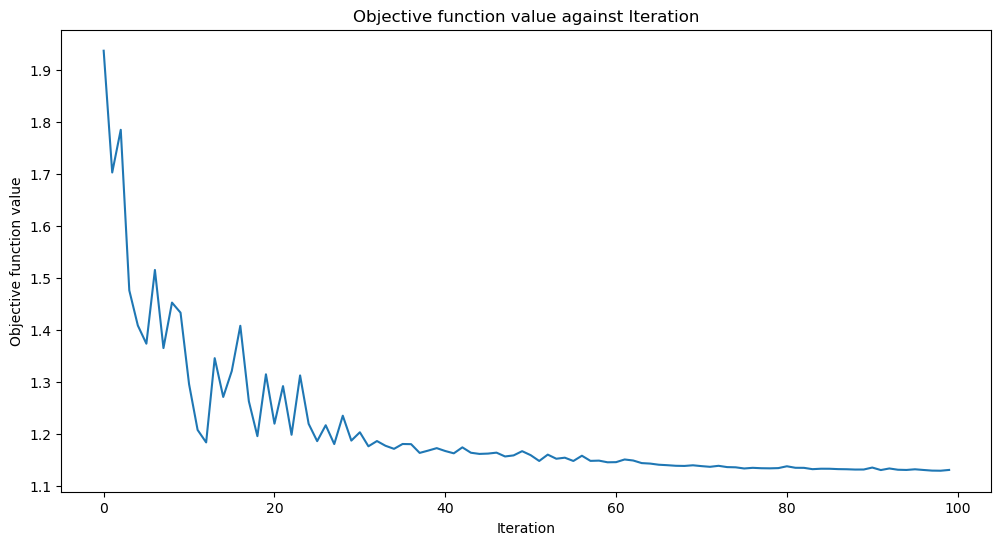

Training time: 46.887325048446655


In [7]:
plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
# Append the value of the objective function to an array so we 
# can plot the iteration verses the objective function value
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [8]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

iris_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

iris_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=iris_feature_map)

In [9]:
from qiskit_machine_learning.algorithms import QSVC

qsvc_full = QSVC(quantum_kernel=iris_kernel)

qsvc_full.fit(train_features, train_labels)

qsvc_score = qsvc_full.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.8666666666666667


Digits

In [12]:
train_features, test_features, train_labels, test_labels, num_features = data_preprocess(load_wine)
feature_map = ZZFeatureMap(feature_dimension=num_features, reps = 1)
ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

load_wine preprocessed


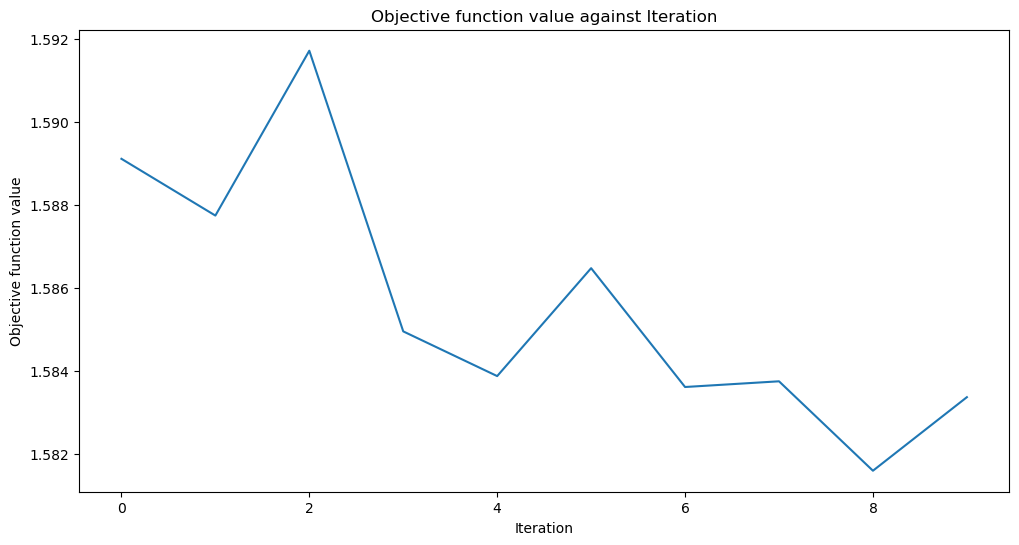

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [ ]:
wine_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

wine_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=wine_feature_map)

In [ ]:
qsvc_full = QSVC(quantum_kernel=wine_kernel)

qsvc_full.fit(train_features, train_labels)

qsvc_score = qsvc_full.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")